In [1]:
#로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [3]:
#데이터를 확인한 후 출력
category = np.max(y_train)+1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0]) #단어가 아닌 숫자로표기, 예를 들어 3이면 세번째로 빈도가 높은 단어
#앞서서 num_words=1000이란 효율을 위해 빈도가 1~1000의 단어만 사용


46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:


# 각 기사의 단어 수가 제각각 다르기 때문에 맞춰줘야함
# 기사의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지 버림
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [5]:
# 원-핫 인코딩 처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


8982
2246
8982
2246


In [13]:
# 모델의 구조를 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation='softmax'))

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test,y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 20s 41ms/step - loss: 2.1531 - accuracy: 0.4432 - val_loss: 1.8257 - val_accuracy: 0.5254
Epoch 2/200
450/450 [==============================] - 18s 41ms/step - loss: 1.9286 - accuracy: 0.5194 - val_loss: 1.8986 - val_accuracy: 0.5232
Epoch 3/200
450/450 [==============================] - 19s 43ms/step - loss: 1.8607 - accuracy: 0.5298 - val_loss: 1.7993 - val_accuracy: 0.5454
Epoch 4/200
450/450 [==============================] - 22s 48ms/step - loss: 1.7255 - accuracy: 0.5633 - val_loss: 1.7321 - val_accuracy: 0.5690
Epoch 5/200
450/450 [==============================] - 20s 46ms/step - loss: 1.6296 - accuracy: 0.5885 - val_loss: 1.6507 - val_accuracy: 0.5935
Epoch 6/200
450/450 [==============================] - 21s 48ms/step - loss: 1.5269 - accuracy: 0.6195 - val_loss: 1.5684 - val_accuracy: 0.6069
Epoch 7/200
450/450 [==============================] - 20s 45ms/step - loss: 1.4077 - accuracy: 0.6347 - val_loss: 1.4312 - val_ac

In [16]:
print('Test Accuracy: %.4f' %(model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 16ms/step - loss: 1.1895 - accuracy: 0.7150
Test Accuracy: 0.7150


In [17]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

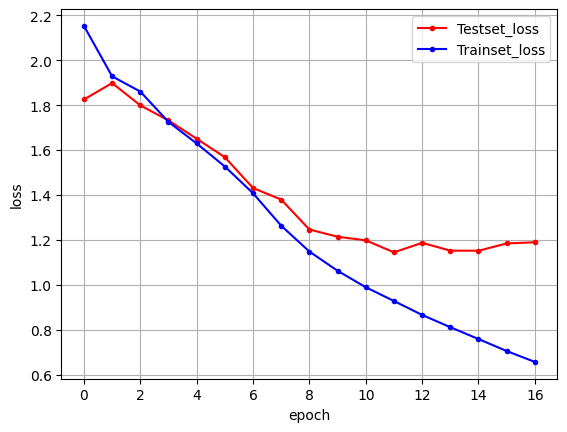

In [22]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label= 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label= 'Trainset_loss')

plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()